## welcome to machine learning

# scikit-learn(sklearn)

In [6]:
#step one workflow of scikit learn
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# prepare data
# creat x (feature) all except target
x = heart_disease.drop("target",axis=1)
# create y which is labels for the output
y = heart_disease["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [43]:
# 2. choose the right model and highperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()  # to avoid warning use n_estimator = 100
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
# 3. fit the model to the training data
import warnings    # to remove some unwanted warnings
warnings.filterwarnings("ignore")   # we have to ignore  or we can use default
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [46]:
# fit to the model using clf.fit
clf.fit(x_train,y_train)   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
#make a prediction
y_label = clf.predict(x_test)
y_label

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [50]:
#4. evalate the model on traing data and test data use clf.score
clf.score(x_train, y_train)   #  should be 100 %

1.0

In [49]:
clf.score(x_test,y_test)    # should be more than 50%

0.8524590163934426

In [30]:
# performance 
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [32]:
print(classification_report(y_test,y_label))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.71      0.76      0.73        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [33]:
confusion_matrix(y_test,y_label)

array([[23,  9],
       [ 7, 22]], dtype=int64)

In [48]:
accuracy_score(y_test,y_label)

0.3770491803278688

In [47]:
# 5. improve a model
import numpy as np
np.random.seed(40)
for i in range(10,100,10):
    print(f"Try modeling using {i} estimator....")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test: {clf.score(x_test,y_test) * 100:.2f}%")    # :.2f for two decimal place
    print(" ")

Try modeling using 10 estimator....
model accuracy on test: 85.25%
 
Try modeling using 20 estimator....
model accuracy on test: 86.89%
 
Try modeling using 30 estimator....
model accuracy on test: 85.25%
 
Try modeling using 40 estimator....
model accuracy on test: 80.33%
 
Try modeling using 50 estimator....
model accuracy on test: 85.25%
 
Try modeling using 60 estimator....
model accuracy on test: 86.89%
 
Try modeling using 70 estimator....
model accuracy on test: 85.25%
 
Try modeling using 80 estimator....
model accuracy on test: 83.61%
 
Try modeling using 90 estimator....
model accuracy on test: 85.25%
 


In [40]:
# 6. save model and load it 
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [42]:
# load model
load_model = pickle.load(open("random_forest_model_1.pkl","rb"))
load_model.score(x_test,y_test)

0.7540983606557377

## prepare data for machine learning model

In [54]:

# # turn the un numerical column to numerical
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(x_train.y_train)
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # our columns 
# catagorical_feature = ["","",""]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",
#                                  one_hot,
#                                  catagorical_feature,)],
#                                remainder="passthrough")
# transform_x = transformer.fit_trasformer(x)


In [128]:
#pd.DataFrame(transformed_x)
#dummies = pd.get_dummies(car_sale[["make","color","doors"]])

car_sale = pd.read_csv("data/car-sales.csv")
car_sale["Price"] = car_sale["Price"].str.replace('[\$\,\.]', '').astype(int)
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [137]:
x = car_sale.drop("Price",axis=1)
y = car_sale["Price"]
# #car_sale["Odometer (KM)"].fillna(car_sale["Odometer (KM)"].mean(),inplace=True)
# #car_sale["Make"].fillna("Honda",inplace=True)
# car_sale["Doors"].fillna(4,inplace=True)
# car_sale["Colour"].fillna("Blue",inplace=True)
# car_sale.head(80)


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### to convert non-numerical data to numerical

In [147]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)    # it will not work because of datatyppe is not numeric

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [132]:
# lets change it into numeric data type
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

 # our columns 
catagorical_feature = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  catagorical_feature)],
                                  remainder="passthrough")
transformed_x = transformer.fit_transform(x)

In [145]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [146]:
dummies = pd.get_dummies(["Make","Colour","Doors"])
dummies

,Colour,Doors,Make
0,0,0,1
1,1,0,0
2,0,1,0


In [140]:
np.random.seed(42)
# refit
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

In [141]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [148]:
model.score(x_test,y_test)

-1.46842368

## what if there is a missing data

## method1: fill missing value using pandas

In [149]:
# to check for missing data
#data_name.isna().sum()
#data.dropna(inplace=true)
car_sale.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [154]:
# example 1
car_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [156]:
# fill missing data using pandas
car_missing["Make"].fillna("missing",inplace=True)
car_missing["Colour"].fillna("missing",inplace=True)
car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(),inplace=True)
car_missing["Doors"].fillna(4,inplace=True)
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [158]:
# we have to drop na from the price because its our label
car_missing.dropna(inplace=True) 
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [164]:
x = car_missing.drop("Price",axis=True)
y = car_missing["Price"]

In [167]:
# convert into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

 # our columns 
catagorical_feature = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  catagorical_feature)],
                                  remainder="passthrough")
transformed_x = transformer.fit_transform(car_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [169]:
np.random.seed(40)
# refit
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [170]:
model.score(x_test,y_test)

0.9999219150579765

## method 2 fill missing value using scikit learn

In [6]:
# import data
car_miss = pd.read_csv("data/car-sales-extended-missing-data.csv")
#car_miss.isna().sum()

In [7]:
# lets remove na from price column by droping
car_miss.dropna(subset=["Price"],inplace=True)
#car_miss.isna().sum()

In [8]:
# remove from the rest using sklearn
# lest define  feautures and label or x& y
x = car_miss.drop("Price",axis=1)
y = car_miss["Price"]
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill catagorical value with missing and numerical value
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
dor_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns with features
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# create an imputer imputation
imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_imputer",dor_imputer,door_feature),
                            ("num_imputer",num_imputer,num_feature)])

# transform data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [10]:
car_sale_filled = pd.DataFrame(filled_x,
                              columns=["Make","Color","Doors","Odometer (KM)"])
car_sale_filled

,Make,Color,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [177]:
car_sale_filled.isna().sum()

Make             0
Color            0
Doors            0
Odometer (KM)    0
dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

 # our columns 
catagorical_feature = ["Make","Color","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  catagorical_feature)],
                                  remainder="passthrough")
transformed_x = transformer.fit_transform(car_sale_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [15]:
# start machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(transformed_x,y,
                                                 test_size = 0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [13]:
model.score(x_test,y_test)

0.17283858824953835

In [17]:
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"try to estimate {i} estimator...")
    model = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
    print(f"test accuracy : {model.score(x_test,y_test)*100:.2f}%")

try to estimate 10 estimator...
test accuracy : 10.61%
try to estimate 20 estimator...
test accuracy : 10.30%
try to estimate 30 estimator...
test accuracy : 8.25%
try to estimate 40 estimator...
test accuracy : 12.82%
try to estimate 50 estimator...
test accuracy : 9.31%
try to estimate 60 estimator...
test accuracy : 9.55%
try to estimate 70 estimator...
test accuracy : 12.03%
try to estimate 80 estimator...
test accuracy : 11.00%
try to estimate 90 estimator...
test accuracy : 9.41%


### 2. chosing the right estimator\algorithm for our problem
sklearn use estimator as anothe term for machine learning model or algorithm

classification = to predict wethre something is one thing or another thing

regression= predicting a number

check in the link below for scikit-learn ml map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 picking a machine learning model for regression problem

In [8]:
#using bostn housing datasets
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [9]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

In [10]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
len(boston_df)

506

In [38]:
from sklearn.linear_model import Ridge

np.random.seed(42)
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model = Ridge()
model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
model.score(x_test,y_test)

0.873969014117403

## how to improve the model 
.1 by changing different types of algorithm

In [46]:
# using randomforestregression
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
model.score(x_test,y_test)

0.873969014117403

## 2.2 chosing estimator for classification problem

In [11]:
# load the data
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# classify feauter and labels
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [15]:
# using machine learning map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 
#find the best model for classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(41)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = LinearSVC()
clf.fit(x_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [8]:
clf.score(x_test,y_test)

0.47540983606557374

In [14]:
# to improve the performance change other model\ algorithm
# using ml map at: https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import RandomForestClassifier
np.random.seed(41)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rf.score(x_test,y_test)

0.8032786885245902

# note:
1. if you have structured data the use ensemble method
2. if you have non-dtructured data then use deep learning or transfer learning

# 3. fit the model\algorithm to make prediction

## 3.1 fitting the model to the data

In [17]:
from sklearn.ensemble import RandomForestClassifier
# setup random seed
np.random.seed(41)

# make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate randomforestclassifier
rf = RandomForestClassifier()

# fit the model to the data (train the machine-learning)
rf.fit(x_train,y_train)

#evaluate the random forest classifier  (use the pattern the model has learned)
rf.score(x_test,y_test)

C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8688524590163934

## 3.2 make prediction using a machine-learning model

### 2 ways to make prediction

1: using predict()  function
2: using predict_proba()


In [18]:
# predict our model
# 1. using predict() function

clf.predict(np.array([1,2,2,4,5]))  # will not work 

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 2 4 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3


In [23]:
rf.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [24]:
# lets compare 
np.array(y_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [25]:
# compare the presicion to the truth leble
y_preds = rf.predict(x_test)
np.mean(y_preds == y_test)    #  y_test is the truth 

0.8688524590163934

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8688524590163934

In [60]:
# let me tray with my own single sample 

c = np.array([[56],[1],[0],[122],[170],[0],[1],[140],[1],[2.7],[0],[0],[1]])  # 13 x 1 
c2=c.T  # 1 x13  transpose
c2.shape

(1, 13)

In [62]:
sample = pd.DataFrame(c2, columns=["age","sex","cp","trestbps","chol",
                              "fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"]
                )
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,56.0,1.0,0.0,122.0,170.0,0.0,1.0,140.0,1.0,2.7,0.0,0.0,1.0


In [75]:
rf.predict(sample)  # we can also us c2 which is array

array([0], dtype=int64)

### 2. using predict_proba()

it will return the probablity of the classification label

In [70]:
# predict_roba return the probability of classification label
rf.predict_proba(x_test[:5])

array([[0.6, 0.4],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.5, 0.5]])

In [71]:
rf.predict_proba(sample)

array([[0.5, 0.5]])

In [73]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## prediction on regression model

In [89]:
boston_df;

In [90]:
# load our data
boston_df;
# make data
x = boston_df.drop("target",axis=1)
y= boston_df["target"]

# import model
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_splitr
np.random.seed(42)
# split data to train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate model
model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)

# evaluate 
model.score(x_test,y_test)

# prediction

y_preds = model.predict(x_test)

In [92]:
y_preds[:5]

array([23.002, 30.826, 16.734, 23.467, 16.853])

In [94]:
np.array(y_test[:5])

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [95]:
# compare to the prediction error using metrics of mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.1226372549019623

# 4. evaluating machine learning model

### there are 3 types of evaluating ml methods

    1.estimator 'score' method

    2. the 'scoring' parameter
    
    3. problem-specific metric function
    
    
    use this link
    
    https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 evaluating model using score method

In [101]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate the model
rf = RandomForestClassifier(n_estimators=100)

# fit the data to the model
rf.fit(x_train,y_train)

# prediction
y_preds = rf.predict(x_test)
y_preds;

#evaluation \ evaluate the model using score method

# evaluation on train model
rf.score(x_train,y_train)

# evaluation on test data
rf.score(x_test, y_test)

0.8524590163934426

### 4.2 evaluation of model using cross-validation 

In [102]:
# import the cross validation package from scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate the model
rf = RandomForestClassifier(n_estimators=100)

# fit the data to the model
rf.fit(x_train,y_train)

# prediction
y_preds = rf.predict(x_test)
y_preds;

#evaluation \ evaluate the model using cross-validation method

cross_val_score(rf,x_test,y_test)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.85714286, 0.76190476, 0.89473684])

In [103]:
# to fix the above error use cv=5 or k-fold k = 5
cross_val_score(rf,x_test, y_test, cv=5)

array([0.76923077, 0.76923077, 0.75      , 0.83333333, 0.90909091])

In [105]:
# cross validation us k different fold version of test data 
# like if k = 5 i.e cv = 5 then it will use 5 different fold version of test data
cross_val_score(rf,x_test, y_test,cv=10)

array([0.85714286, 0.71428571, 1.        , 0.66666667, 0.66666667,
       0.66666667, 0.83333333, 0.66666667, 0.83333333, 1.        ])

In [109]:
# lets compare single score and cross valid score
np.random.seed(42)
single_score = rf.score(x_test, y_test)
cross_score = np.mean(cross_val_score(rf,x_test, y_test, cv=5))

single_score, cross_score

(0.8524590163934426, 0.8382284382284382)

In [112]:
# the default value of score is the mean of score acuracy
np.random.seed()
cross_val_score(rf,x_test, y_test, cv=5, scoring=None)

array([0.76923077, 0.76923077, 0.75      , 0.83333333, 0.90909091])

### 4.2.1 classification model evaluation matrics

    1. Accuracy
    2. Area under ROC curve
    3. confusion matrix
    4. classification report

### Accuracy

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# make data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# instantiate the model
rf = RandomForestClassifier(n_estimators=100)
# fit the data to the model
rf.fit(x_train,y_train)
# prediction
y_preds = rf.predict(x_test)
y_preds;

#evaluation \ evaluate the model using cross-validation method
cross_val_score(rf,x_test,y_test,cv=5)

# accuracy
print(f"the accuracy ot the classification model is {np.mean(cross_val_score(rf,x_test, y_test,cv=5))*100:.2f}%")

the accuracy ot the classification model is 82.16%


**the area under the receiver operating characterstics curve (AUC\ROC)**

*ROC is a measure of true positve rate vs false positive rate of a model (tpr vs fpr)*

        true positve = model predict 1 when the truth is 1
        false positve = model predict 1 when the truth is 0
        true negative = model predict 0 when the truth is 0
        negative false = model predict 0 when the truth is 1

In [116]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# make data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# instantiate the model
rf = RandomForestClassifier(n_estimators=100)
# fit the data to the model
rf.fit(x_train,y_train)
# probability prediction
y_probs = rf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [118]:
y_probs_positive = y_probs[:,1]

In [119]:
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [127]:
fpr, tpr,thresholds = roc_curve(y_test, y_probs_positive)

In [128]:
tpr[:10]

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 ])

In [129]:
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552])

In [130]:
thresholds

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

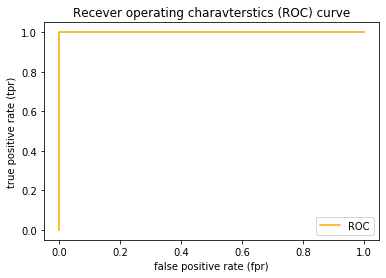

In [136]:
# lets plot
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color="orange",label = "ROC")
    #plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label = "Gussing")
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Recever operating charavterstics (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

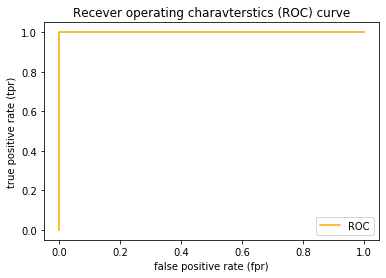

In [137]:
# plot perfect roc
fpr, tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [138]:
#perfect auc
roc_auc_score(y_test,y_test)

1.0

### confusion matrix

 confusion matrix is a quick way tocompare the label a model predicted and the actual label thatsupposed to be
 
 its 4 x 4 matrix whrer the lefet diagonal will show the correct prediction and the right diagonal show the false positve and negative estimation
 
 always all prediction comparsion is between y_test and y_predicted

In [142]:
from sklearn.metrics import confusion_matrix

y_preds = rf.predict(x_test)
y_preds;

In [148]:
# confusioon matrix
a = confusion_matrix(y_test,y_preds)

In [146]:
# let visualize using crosstab  
pd.crosstab(y_test,
           y_preds,
           rownames=["actuall labels"],
           colnames=["predicted labels"])


predicted labels,0,1
actuall labels,,
0,24,5
1,4,28


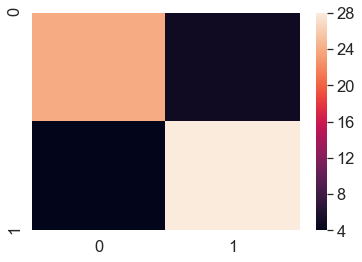

In [153]:
#24 and 28 is the correcte prediction 
# where 4 and 5 are false positve,5,  and false negative (4)

# let visualize in more clear way of confusion matrix using seaborn.heatmap()
import seaborn as sns
sns.set(font_scale=1.5)
confusion_mat = confusion_matrix(y_test, y_preds)
ax = sns.heatmap(confusion_mat)

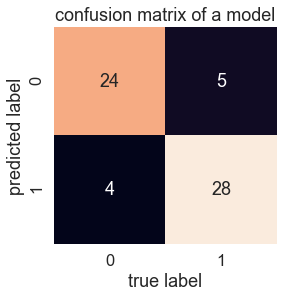

In [160]:
# to insert conf_mat value on heatmap
def conf_plot(confusion_mat):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_mat,
                          annot=True,
                          cbar=False)  # annot = annotate with confusion matrix data
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("confusion matrix of a model")
    # fixthe broken annottion (it happend when using matplotlib 3.1.1)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)

conf_plot(confusion_mat)

In [ ]:
## in order to install library or package using notebook

# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

**classification report**

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [162]:
# where precission and recall become valuable
true_disease = np.zeros(10000)
true_disease[0] = 1;
preds_disease = np.zeros(10000)
pd.DataFrame(classification_report(true_disease,preds_disease,
                                  output_dict=True))

C:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluaion metrics
    model evaluation metrics documentation https://scikit-learn.org/stable/modules/model_evaluation.html
    
    1. R^2   determination coefficient
    2. mean absolute error (MAE)
    3.mean square error (MSE)
    
    
    

**R^2**
    
    R^2 compare your model prediction to the mean of the target.
    
    if the model predict the mean of the target its r^2 is 0,
    if the model perfectly predict the range of numbers its r^2 is 1
    

In [16]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.873969014117403

In [17]:
# let see r^2  example
from sklearn.metrics import r2_score
# fill an arry with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean
#y_test.mean()

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [172]:
y_test.mean()

21.488235294117654

In [173]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [174]:
# lets see now our model predict the mean of the target so r^2 should be 0 it can be go to -ve infinity

r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [175]:
r2_score(y_test,y_test)

1.0

**MAE**

In [18]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [23]:
#let see how it works
df = pd.DataFrame(data={"actual value":y_test,"predicted value":y_preds})
df["difference"] = df["predicted value"] - df["actual value"]
df

,actual value,predicted value,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean-square error (MSE)**

In [20]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(x_test)
mean_squared_error(y_test,y_preds)

9.242328990196082

In [26]:
# calculate MSE by hands
squared = np.square(df["difference"])
squared;
mse = squared.mean()
mse

9.24232899019608

**note: increase r^2, minimize mean square error and mean absolute error**

## 4.2.3  final evaluation metrics scoring

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# cross_val
np.random.seed(42)
cross_acc = cross_val_score(clf, x, y, cv=5,scoring=None)
cross_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [38]:
np.mean(cross_acc)

0.8248087431693989

In [43]:
# accuracy  scoring = "accuracy"
np.random.seed(42)
cross_acc = cross_val_score(clf, x, y, cv=5,scoring="accuracy")
cross_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [44]:
print(f"the cross validation accuracy is: {np.mean(cross_acc)*100:.2f}%")

the cross validation accuracy is: 82.48%


In [45]:
# precission scoring
np.random.seed(42)
cross_precision = cross_val_score(clf, x, y, cv=5,scoring="precision")
cross_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [46]:
print(f"the cross validation precision is: {np.mean(cross_precision)*100:.2f}%")

the cross validation precision is: 83.30%


In [50]:
# recall scoring
np.random.seed(42)
cross_recall = cross_val_score(clf, x, y, cv=5,scoring="recall")
cross_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [51]:
print(f"the cross validation recall is: {np.mean(cross_recall)*100:.2f}%")

the cross validation recall is: 85.45%


In [49]:
# f1 scoring
np.random.seed(42)
cross_f1 = cross_val_score(clf, x, y, cv=5,scoring="f1")
cross_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [52]:
print(f"the cross validation f1 is: {np.mean(cross_f1)*100:.2f}%")

the cross validation f1 is: 84.27%


### scoring metrics for regression model

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

# cross validation for r^2, neg_absolute_error, neg_mean_squared

# cross_r^2
cross_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
cross_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [57]:
np.mean(cross_r2)

0.622375083951403

In [59]:
# r2
cross_r2 = cross_val_score(model, x, y, cv=5, scoring="r2")
cross_r2

array([0.77488664, 0.85978021, 0.7593916 , 0.47325   , 0.28158931])

In [56]:
#neg_mean_absolute_error
cross_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cross_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [60]:
# mean square error
cross_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
cross_mse

array([ -7.39124675, -12.80369927, -21.44045174, -46.88481495,
       -19.38141243])

In [62]:
np.mean(cross_mae), np.mean(cross_r2), np.mean(cross_mse)

(-2.9961217433508045, 0.6297795514272772, -21.580325026247316)

### using different evaluation metrics as scikit-learn function

**classification evaluation function**

In [64]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)

In [68]:
# metrics function
acc_score = accuracy_score(y_test,y_preds)
pre_score = precision_score(y_test,y_preds)
f_score = f1_score(y_test, y_preds)
recal_score = recall_score(y_test, y_preds)

In [73]:
print(f"accuracy score is: {acc_score*100:.2f}%")
print(f"precision score is: {pre_score*100:.2f}%")
print(f"f1 score is: {f_score*100:.2f}%")
print(f"recall score is: {recal_score*100:.2f}%")

accuracy score is: 85.25%
precision score is: 84.85%
f1 score is: 86.15%
recall score is: 87.50%


**regression evaluation function**

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

y_preds = model.predict(x_test)
y_preds

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [80]:
#regression evaluation function
r2 = r2_score(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
#print

print(f"the r^2 score is : {r2}")
print(f"the mean absolute error score is : {mae}")
print(f"the mean squared error score is : {mse}")

the r^2 score is : 0.8739690141174031
the mean absolute error score is : 2.1226372549019623
the mean squared error score is : 9.242328990196082


## 5. improving a model
    
    first prediction: baseline prediction
    first model : baseline model
    
    improving model has 2 perspective 
        from data perspective and
        from model perspective
    
    parameters: model finds these patterens in data
    hyperparameters: setting on a model that you can adjust to (potentially) improve its ability to find patterns
    
    
    **model.get_params**
    
    
  3 way to adjust hyperparameters
      1. by hand
      2. randomly using randomsearchcv
      3. exhaustively with gridsearchcv
  
  

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparameter with hand

**lets make 3 set:  training, validation and test** 
    
    we'r going to try 
    
   n_estimators
   
   min_sample_leaf
   
   min_sample_split
   
   max_depth
   
   max_feature

In [101]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
# perform evaluation
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    # create dictionary to store
    dictionay_evalu = {"accuracy":round(accuracy,2),
                      "precision":round(precision,2),
                      "recall":round(recall,2),
                      "f1":round(f1,2)}
    # print values
    print(f"the accuracy of model is:{accuracy * 100:.2f}")
    print(f"the precision of model is:{precision:.2f}")
    print(f"the recall of model is:{recall:.2f}")
    print(f"the f1 of model is:{f1:.2f}")
    
    return dictionay_evalu


In [97]:
# lets start 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# lets shuffle the data to divide in to test,train and validation
heart_disease_shuffled = heart_disease.sample(frac=1)
heart_disease_shuffled;
# let split the data
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# lets split by hand
train_split = round(0.7 *len(heart_disease_shuffled)) # 70 percent  0.7 * len(heart_d)
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) 
x_train,y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

# check len
#len(x_test), len(x_valid),len(x_train)
# lets start ml
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# baseline prediction
y_preds = clf.predict(x_valid)

# evalute the classifier on the validation
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


the accuracy of model is:80.00
the precision of model is:0.86
the recall of model is:0.83
the f1 of model is:0.85


{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.83, 'f1': 0.85}

In [99]:
# create second classifier with different hyperparameter
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)
# make prediction
y_preds_2 = clf_2.predict(x_valid)

# evaluation metrics
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

the accuracy of model is:88.89
the precision of model is:0.90
the recall of model is:0.93
the f1 of model is:0.92


In [108]:
# now try with max_depth
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf_3.fit(x_train, y_train)
# make prediction
y_preds_3 = clf_3.predict(x_valid)

# evaluation metrics
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

the accuracy of model is:86.67
the precision of model is:0.88
the recall of model is:0.93
the f1 of model is:0.90


## 5.2 hyperparmeter tuning using RandomizedSearchCV

In [110]:
from sklearn.model_selection import RandomizedSearchCV

# create dictionary for hyperparameters
pgrid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# make data
x = heart_disease_shuffled.drop("target",axis=1)
y =heart_disease_shuffled["target"]

# split
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

# instantitate classifier
clf = RandomForestClassifier(n_jobs=1)

#setup randomized search cv
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=pgrid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

# let fit the model with new rs_clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.7s finished
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [111]:
# now lets get the best_params_
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [112]:
# lets make prediction
rs_y_preds = rs_clf.predict(x_test)

# evaluation
rs_metrics = evaluate_preds(y_test, rs_y_preds)

the accuracy of model is:86.89
the precision of model is:0.88
the recall of model is:0.88
the f1 of model is:0.88


In [ ]:
# in order to see or get a better improvement we try by changing n_iter = 

## 5.3 hyperparameter tuning using grid search

In [114]:
pgrid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [116]:
from sklearn.model_selection import GridSearchCV,train_test_split
pgrid_2 = {"n_estimators": [10,100,200,500],
        "max_depth": [None],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1,2]}

np.random.seed(42)

# make data
x = heart_disease_shuffled.drop("target",axis=1)
y =heart_disease_shuffled["target"]

# split
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

# instantitate classifier
clf = RandomForestClassifier(n_jobs=1)

#setup randomized search cv
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=pgrid_2,  
                           cv=5,
                           verbose=2)

# let fit the model with new rs_clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto,

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=s

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   22.1s finished
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [117]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [118]:
# lets make prediction
gs_y_preds = gs_clf.predict(x_test)

# evaluation
gs_metrics = evaluate_preds(y_test, rs_y_preds)

the accuracy of model is:86.89
the precision of model is:0.88
the recall of model is:0.88
the f1 of model is:0.88


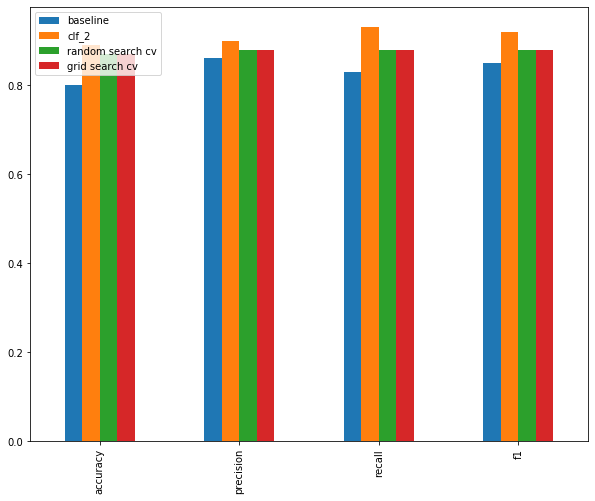

In [120]:
#let's compare and make a plot
comp_metrics = pd.DataFrame({"baseline":baseline_metrics,
                       "clf_2":clf_2_metrics,
                       "random search cv":rs_metrics,
                       "grid search cv":gs_metrics})
comp_metrics.plot.bar(figsize=(10,8));

# 6. save and load trained machine-learning  model

#### we can use
    paython 'pickle' or
    'joblib'

**1: using pickle**

In [125]:
import pickle

# save model
pickle.dump(gs_clf,open("gs_saved_model.pkl","wb"))

#load model
load_model = pickle.load(open("gs_saved_model.pkl","rb"))
load_model;
# make prediction
picle_y_preds = load_model.predict(x_test)
# evaluation
metrics_pickl = evaluate_preds(y_test,picle_y_preds)

the accuracy of model is:78.69
the precision of model is:0.79
the recall of model is:0.82
the f1 of model is:0.81


**2: using joblib**

In [127]:
from joblib import dump,load

# save model
dump(gs_clf, filename="gs_saved_model.joblib")

['gs_saved_model.joblib']

In [128]:
# import or load saved model
load_model = load(filename="gs_saved_model.joblib")

In [129]:
# make prediction
joblib_y_preds = load_model.predict(x_test)

# valuation of metrics
joblib_metrics = evaluate_preds(y_test, joblib_y_preds)

the accuracy of model is:78.69
the precision of model is:0.79
the recall of model is:0.82
the f1 of model is:0.81


# 7. Putting it all together

*using pipline*

In [ ]:
# step 1: load data
# step2 : is there missing data check with  data.isna.sum()
    # then fill with required data
# convert data to numbers
# build the model on the data

In [163]:
# getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
import numpy as np
np.random.seed(42)

# import data and drop missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
#data.isna().sum()
# drop missing lables from price
data.dropna(subset=["Price"],inplace=True)
#data.isna().sum()

# define different catagorical feature and transformer for make, color,door and odometer

catagorical_features = ["Make","Colour"]
catagorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
                                         ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# setup preprocessing steps and convert to numbers
preprocess = ColumnTransformer(transformers=[
    ("catagorical", catagorical_transformer,catagorical_features),
    ("door",door_transformer,door_feature),
    ("numerical",numeric_transformer,numeric_feature)
])
# create a preprocessing and modeling pipline
model = Pipeline(steps=[("preprocessng",preprocess),
                       ("model",RandomForestRegressor())])

# split data
x = data.drop("Price",axis=1)
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit to the model

model.fit(x_train, y_train)
# evaluate
model.score(x_test, y_test)

C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1821575815702311

**how to improve this using gridsearchcv ?**

In [166]:

# using gridsearchcv
from sklearn.model_selection import GridSearchCV
pip_grid = {
    "preprocessng__numerical__imputer__strategy": ["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

# let see
gs_model = GridSearchCV(model, pip_grid,cv=5, verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessng__numerical__imputer__strategy=mean 
[CV]  model__max_de

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessng__numerical__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessng__numerical__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessng__numerical__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessng__numerical__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessng__numerical__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessng__numerical__imputer__strategy=median 
[CV]  m

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=mean, total=   1.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=median 
[CV]  model__max_depth=5, mod

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessng__numerical__imputer__strategy=median, total=   1.7s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessng',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('catagorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
            

In [169]:
gs_model.score(x_test, y_test)

0.3337859800130589

# Congratulations